In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [4]:
print("Train df size",train_df.shape)
print("Test df size",test_df.shape)

Train df size (1200000, 21)
Test df size (800000, 20)


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

<Axes: >

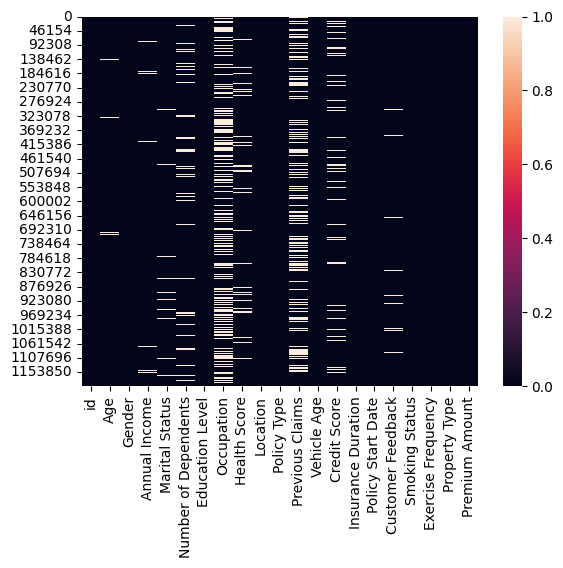

In [6]:
sns.heatmap(train_df.isna())

In [7]:
def num_values(df: pd.DataFrame):
    return df.isna().sum()

print(num_values(train_df),'\n\n',num_values(test_df))

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64 

 id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location                     0
Policy Type            

In [8]:
def date_trans(df):
    df['Policy Start Date']= pd.to_datetime(df['Policy Start Date'])
    df['Year'] = df['Policy Start Date'].dt.year
    df['Day'] = df['Policy Start Date'].dt.day
    df['Month'] = df['Policy Start Date'].dt.month
    df['DayOfWeek'] = df['Policy Start Date'].dt.dayofweek
    df.drop('Policy Start Date' , axis =1, inplace = True)
    return df


train_data = date_trans(train_df)
test_data = date_trans(test_df)

In [9]:
def feature_gen(df1: pd.DataFrame):
    df1["Annual_Income_Health_Score_Ratio"] = df1["Annual Income"] / df1["Health Score"] 
    df1["Annual_Income_Health_Score"] = df1["Annual Income"] * df1["Health Score"]
    
    df1["Annual_Income_Credit_Score_Ratio"] = df1["Annual Income"] / df1["Credit Score"]
    df1["Annual_Income_Credit_Score"] = df1["Annual Income"] * df1["Credit Score"]

    df1["Vehicle_Age_Insurance_Duration"] = df1["Vehicle Age"] / df1["Insurance Duration"]
    df1['Annual_Income_Previous_Claims'] = df1['Previous Claims'] * df1['Annual Income']

    df1['Policy Start Month Sin'] = np.sin(df1['Month'] / 12 * 2 * np.pi)
    df1['Policy Start Month Cos'] = np.cos(df1['Month'] / 12 * 2 * np.pi)
    df1['Policy Start Day Sin'] = np.sin(df1['Day'] / 31 * 2 * np.pi)
    df1['Policy Start Day Cos'] = np.cos(df1['Day'] / 31 * 2 * np.pi)
    df1['Policy Start DayOfWeek Sin'] = np.sin(df1['DayOfWeek'] / 7 * 2 * np.pi)
    df1['Policy Start DayOfWeek Cos'] = np.cos(df1['DayOfWeek'] / 7 * 2 * np.pi)
    return df1

train_data = feature_gen(train_data)
test_data = feature_gen(test_data)

In [10]:
train_data.dtypes.value_counts()

float64    21
object     10
int32       4
int64       1
Name: count, dtype: int64

In [11]:
num_cols = train_data.select_dtypes(include=['number']).columns.to_list()
cat_cols = train_data.select_dtypes(include=['object']).columns.to_list()

print(num_cols,'\n\n', cat_cols)

['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount', 'Year', 'Day', 'Month', 'DayOfWeek', 'Annual_Income_Health_Score_Ratio', 'Annual_Income_Health_Score', 'Annual_Income_Credit_Score_Ratio', 'Annual_Income_Credit_Score', 'Vehicle_Age_Insurance_Duration', 'Annual_Income_Previous_Claims', 'Policy Start Month Sin', 'Policy Start Month Cos', 'Policy Start Day Sin', 'Policy Start Day Cos', 'Policy Start DayOfWeek Sin', 'Policy Start DayOfWeek Cos'] 

 ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']


/tmp/ipykernel_879/882103039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_data, x = i, palette='muted', ax=axis[0])
/tmp/ipykernel_879/882103039.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, y='Premium Amount', palette='muted', ax=axis[1])


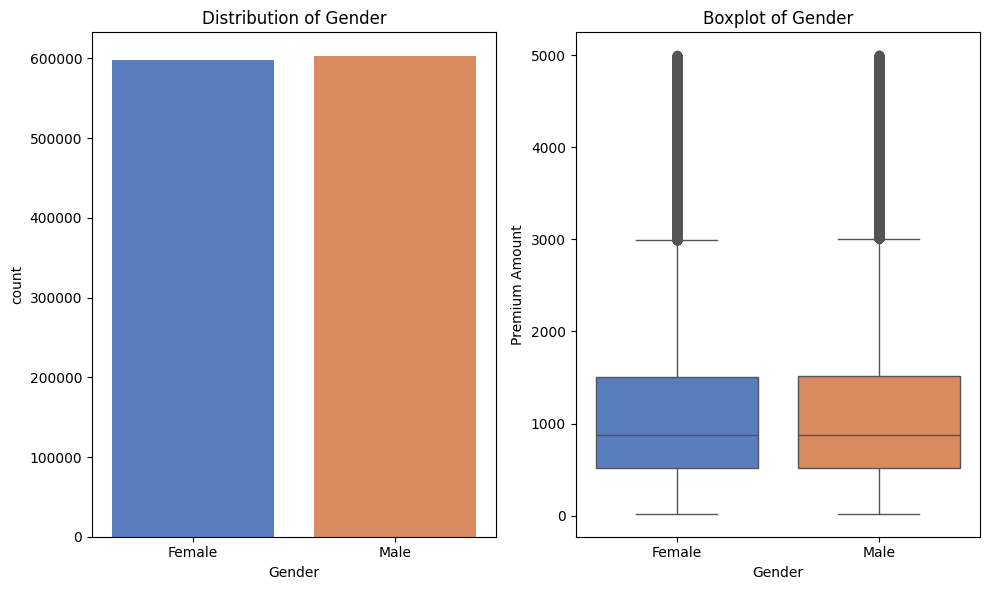

/tmp/ipykernel_879/882103039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_data, x = i, palette='muted', ax=axis[0])
/tmp/ipykernel_879/882103039.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, y='Premium Amount', palette='muted', ax=axis[1])


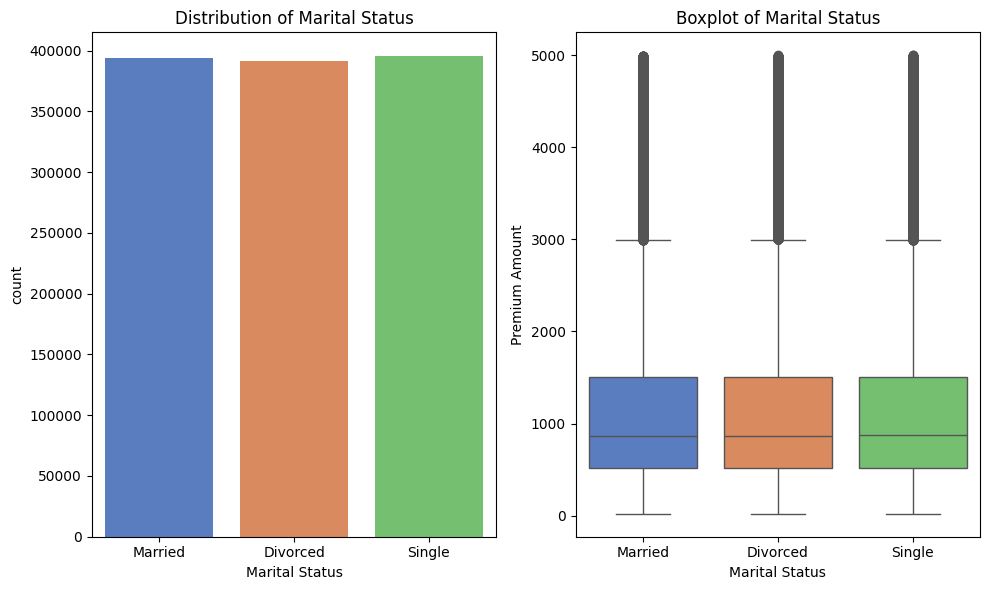

/tmp/ipykernel_879/882103039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_data, x = i, palette='muted', ax=axis[0])
/tmp/ipykernel_879/882103039.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, y='Premium Amount', palette='muted', ax=axis[1])


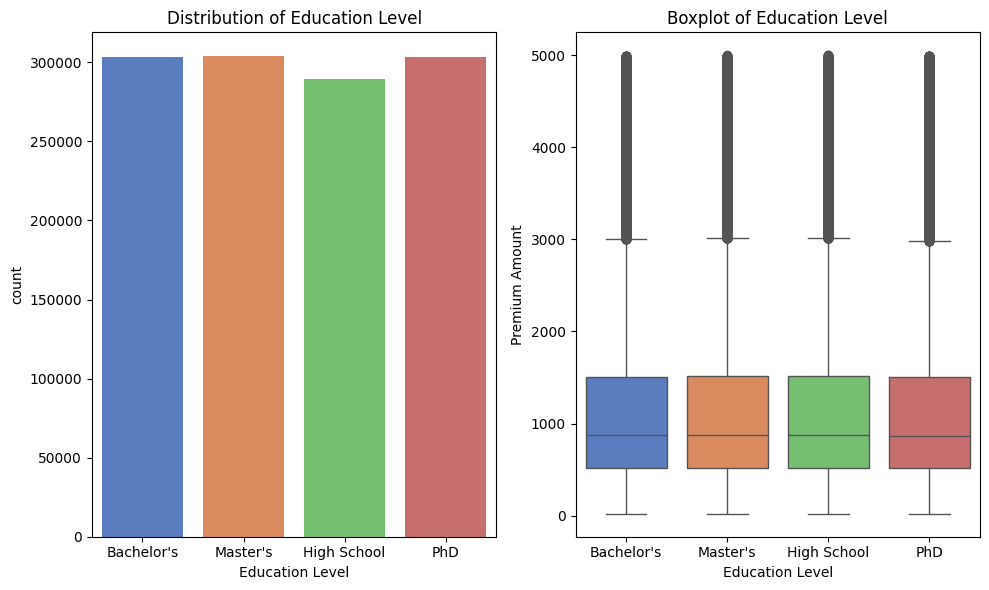

/tmp/ipykernel_879/882103039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_data, x = i, palette='muted', ax=axis[0])
/tmp/ipykernel_879/882103039.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, y='Premium Amount', palette='muted', ax=axis[1])


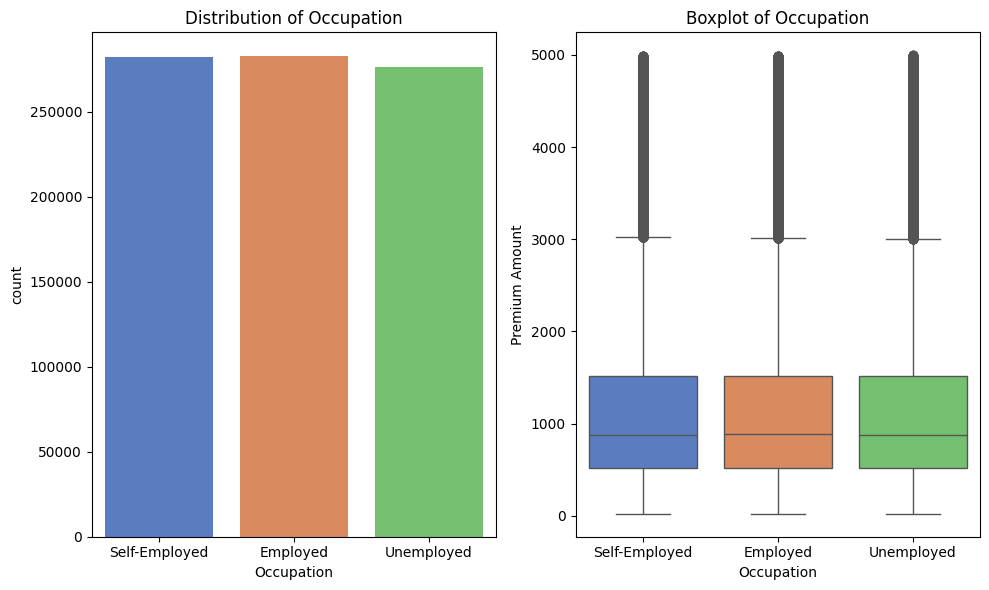

/tmp/ipykernel_879/882103039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_data, x = i, palette='muted', ax=axis[0])
/tmp/ipykernel_879/882103039.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, y='Premium Amount', palette='muted', ax=axis[1])


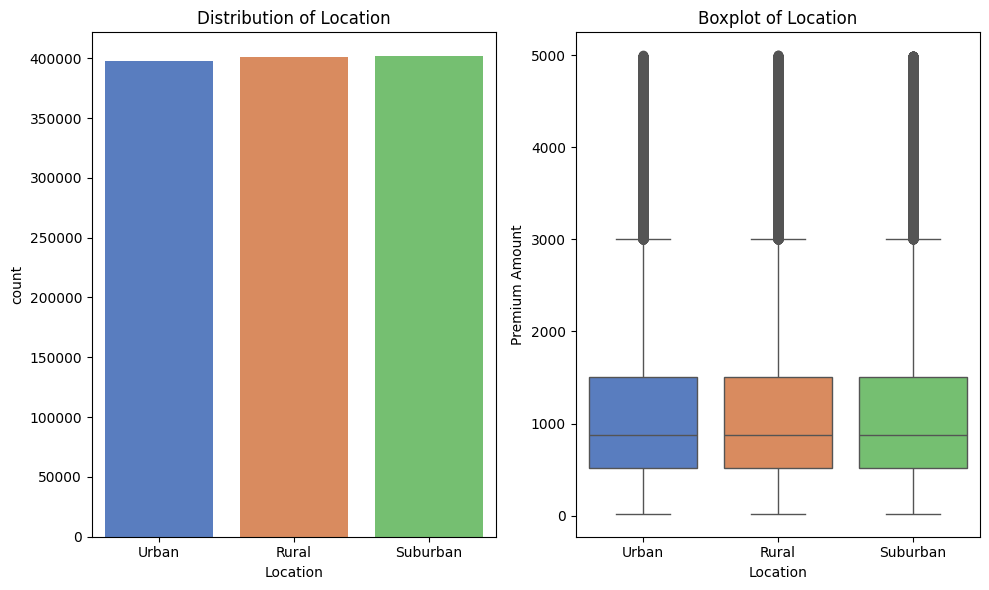

/tmp/ipykernel_879/882103039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_data, x = i, palette='muted', ax=axis[0])
/tmp/ipykernel_879/882103039.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, y='Premium Amount', palette='muted', ax=axis[1])


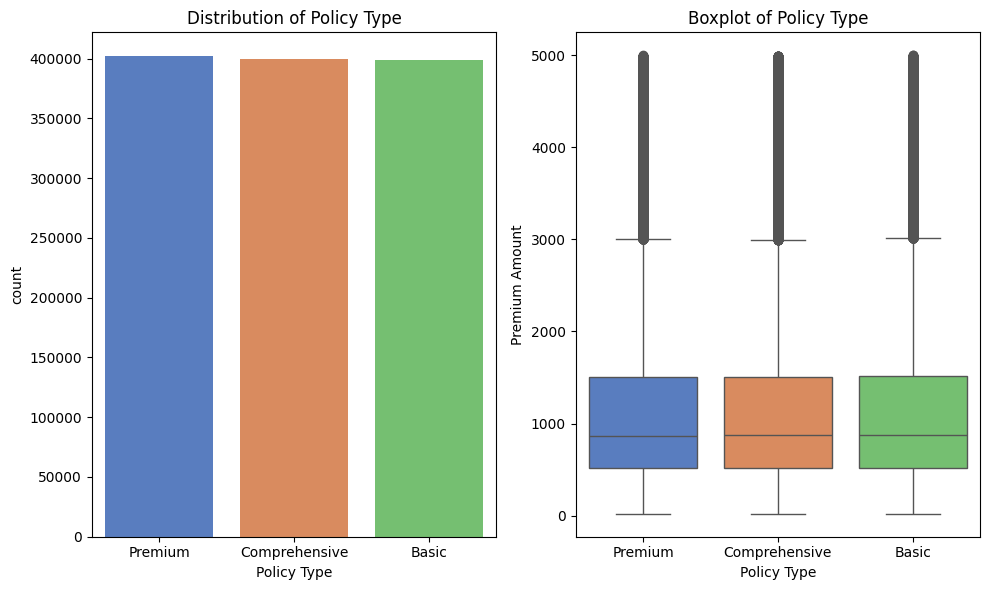

/tmp/ipykernel_879/882103039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_data, x = i, palette='muted', ax=axis[0])
/tmp/ipykernel_879/882103039.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, y='Premium Amount', palette='muted', ax=axis[1])


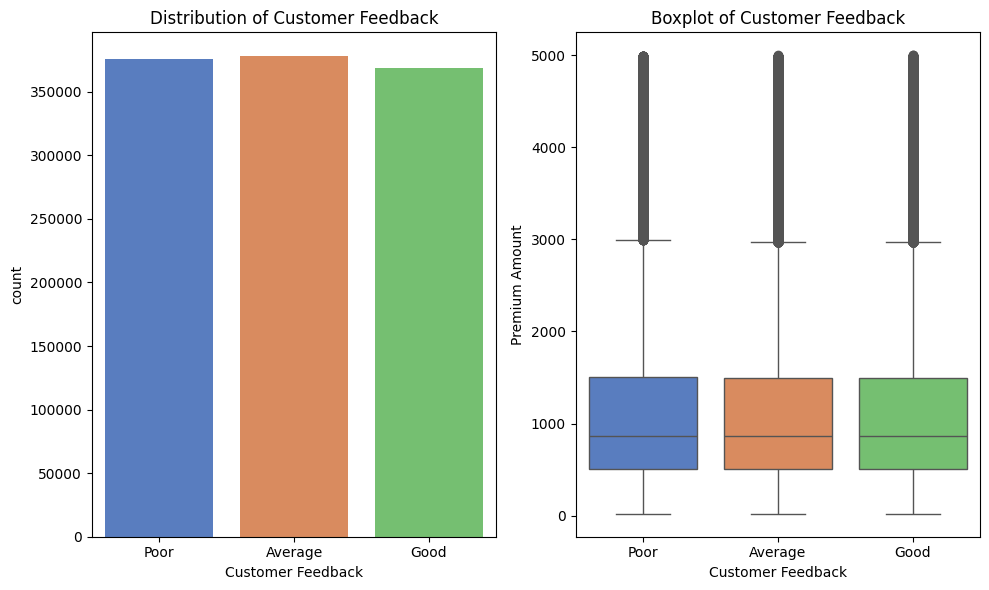

/tmp/ipykernel_879/882103039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_data, x = i, palette='muted', ax=axis[0])
/tmp/ipykernel_879/882103039.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, y='Premium Amount', palette='muted', ax=axis[1])


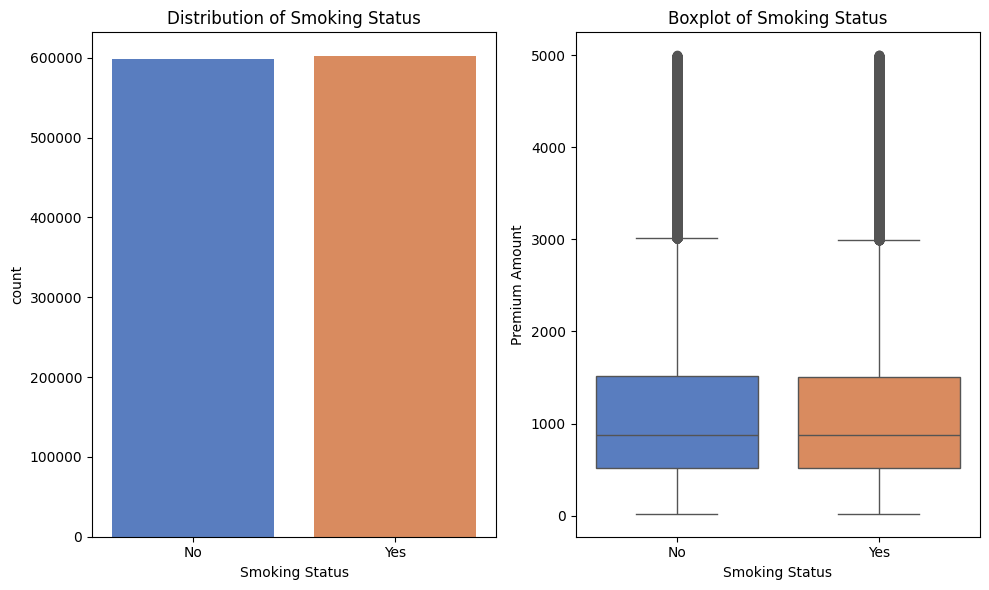

/tmp/ipykernel_879/882103039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_data, x = i, palette='muted', ax=axis[0])
/tmp/ipykernel_879/882103039.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, y='Premium Amount', palette='muted', ax=axis[1])


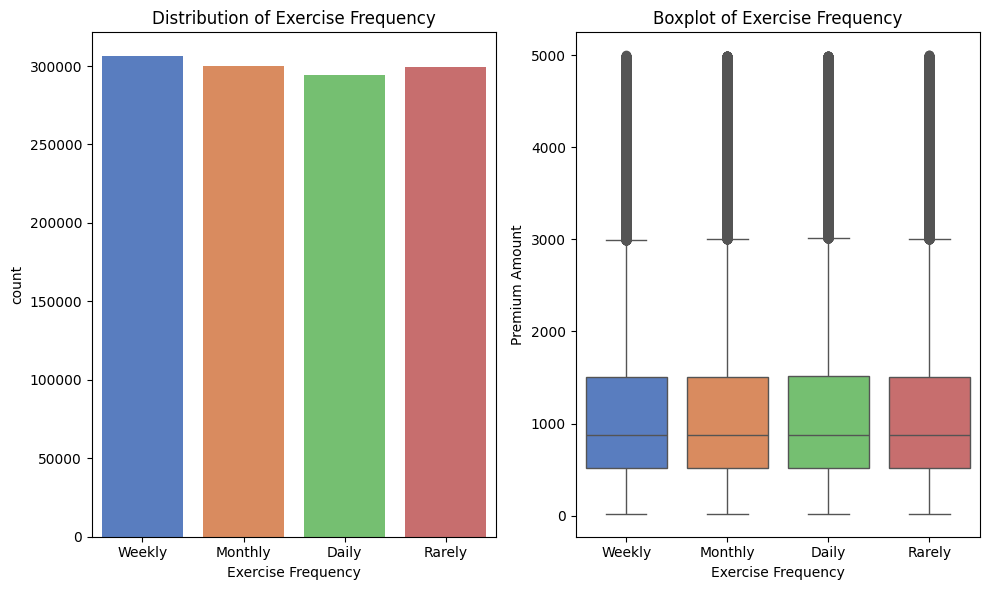

/tmp/ipykernel_879/882103039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_data, x = i, palette='muted', ax=axis[0])
/tmp/ipykernel_879/882103039.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, y='Premium Amount', palette='muted', ax=axis[1])


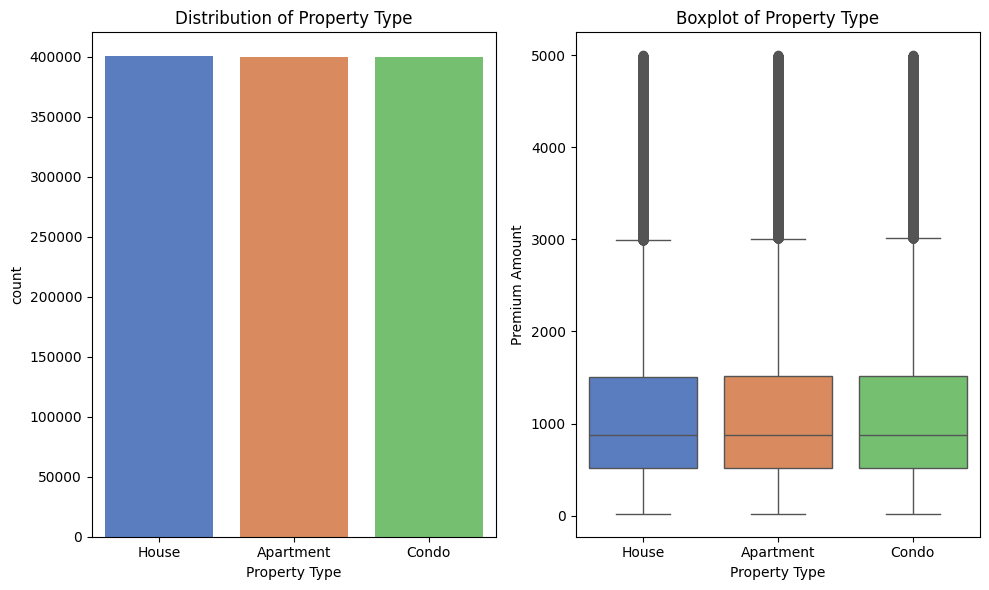

In [12]:
for i in cat_cols:
    fig, axis = plt.subplots(1,2 , figsize=(10,6))
    sns.countplot(data = train_data, x = i, palette='muted', ax=axis[0])
    axis[0].set_title(f'Distribution of {i}')
    axis[0].set_xlabel(i)
    axis[0].set_ylabel('count')
    
    sns.boxplot(data = train_data, x=i, y='Premium Amount', palette='muted', ax=axis[1])
    axis[1].set_title(f'Boxplot of {i}')
    axis[1].set_xlabel(i)
    axis[1].set_ylabel('Premium Amount')
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


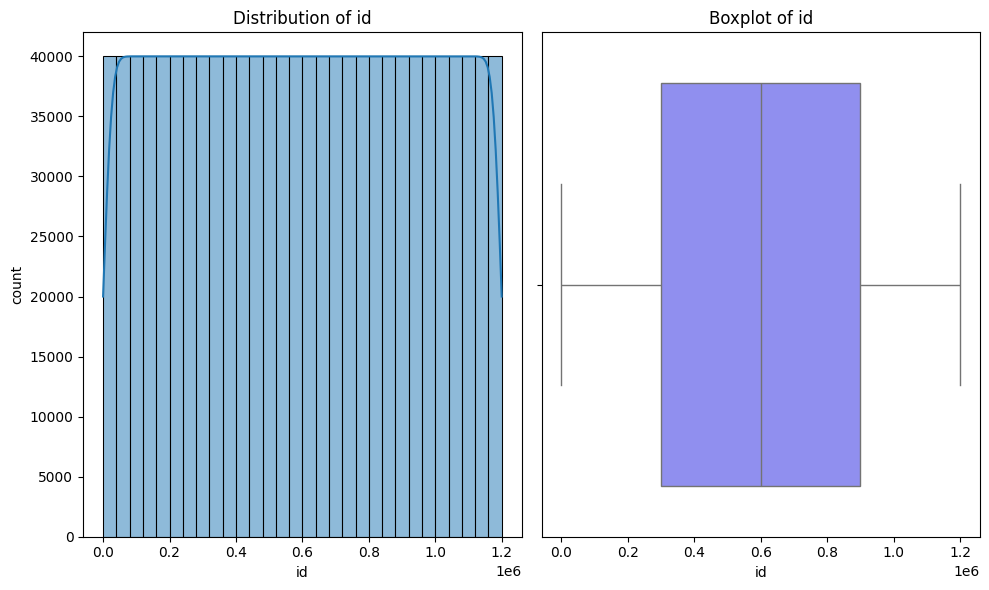

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


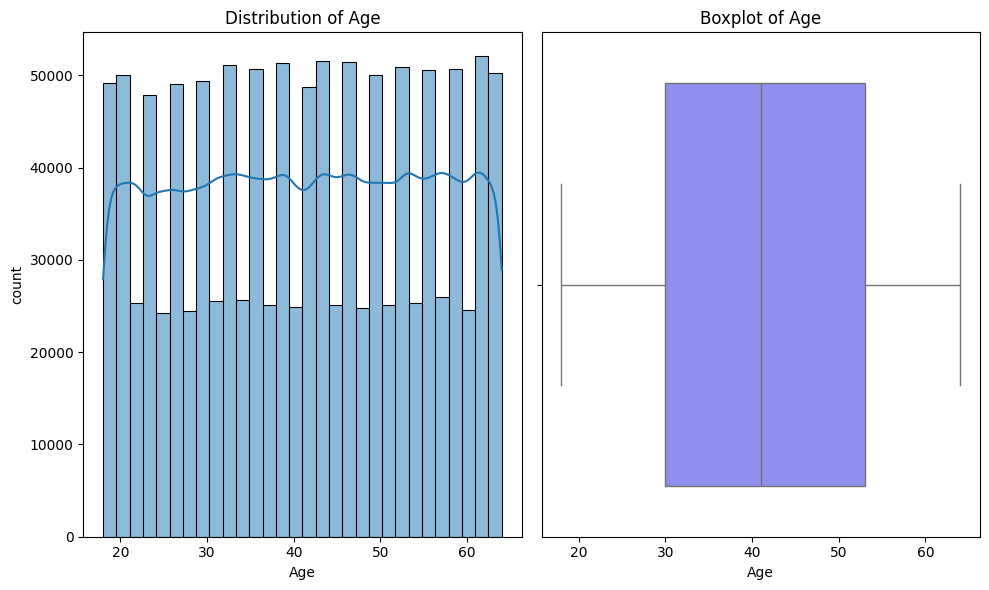

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


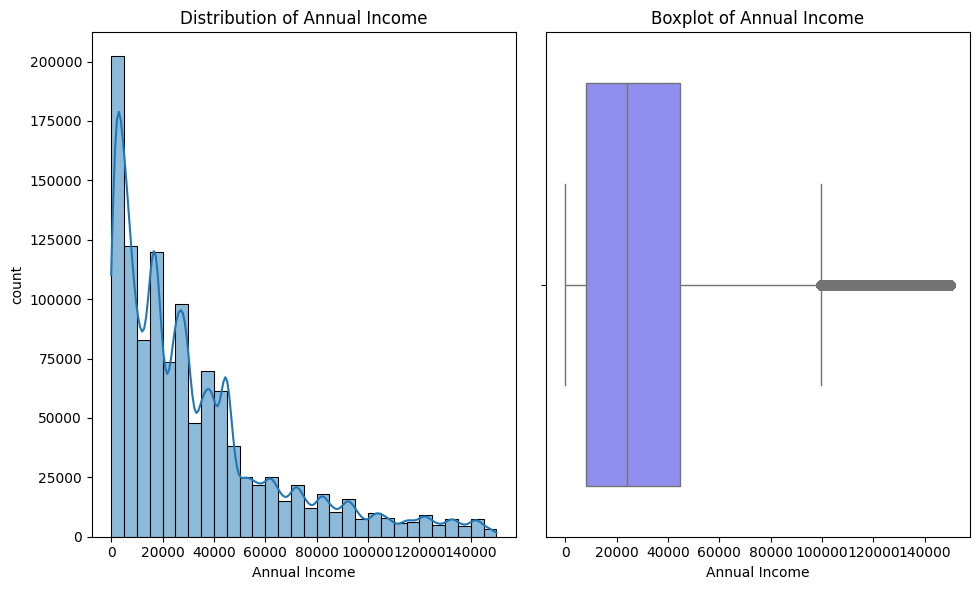

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


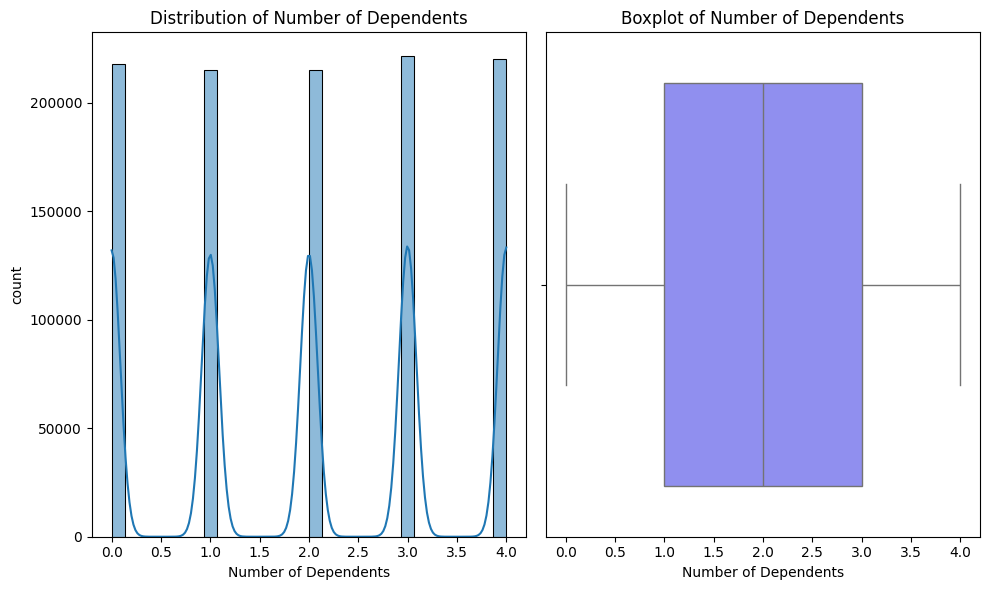

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


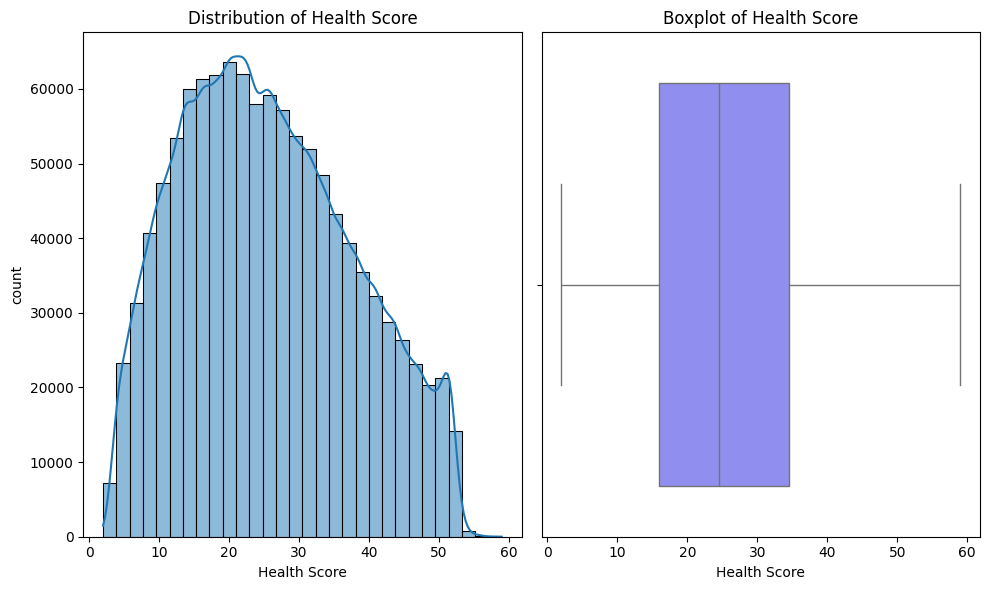

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


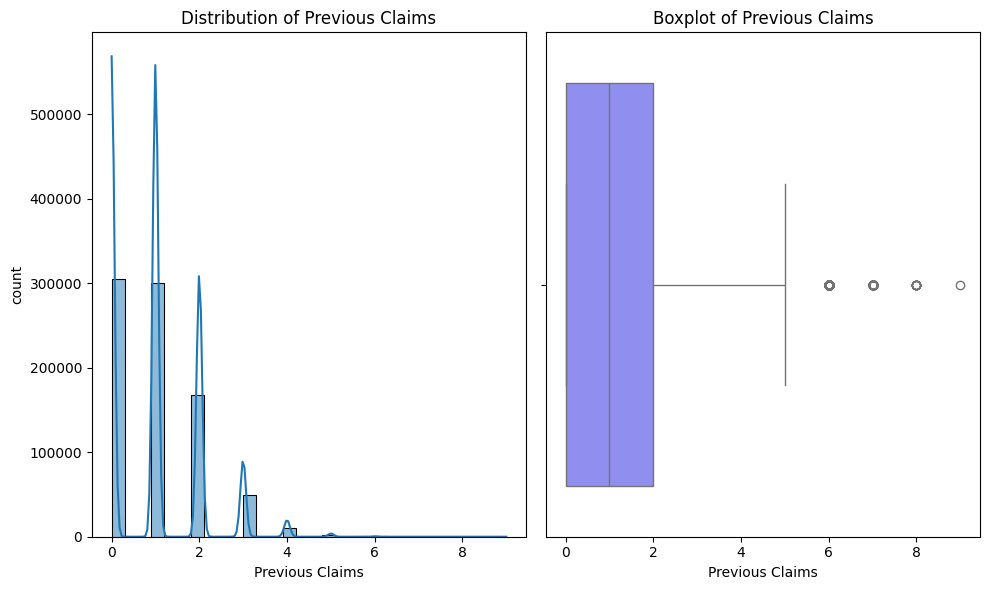

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


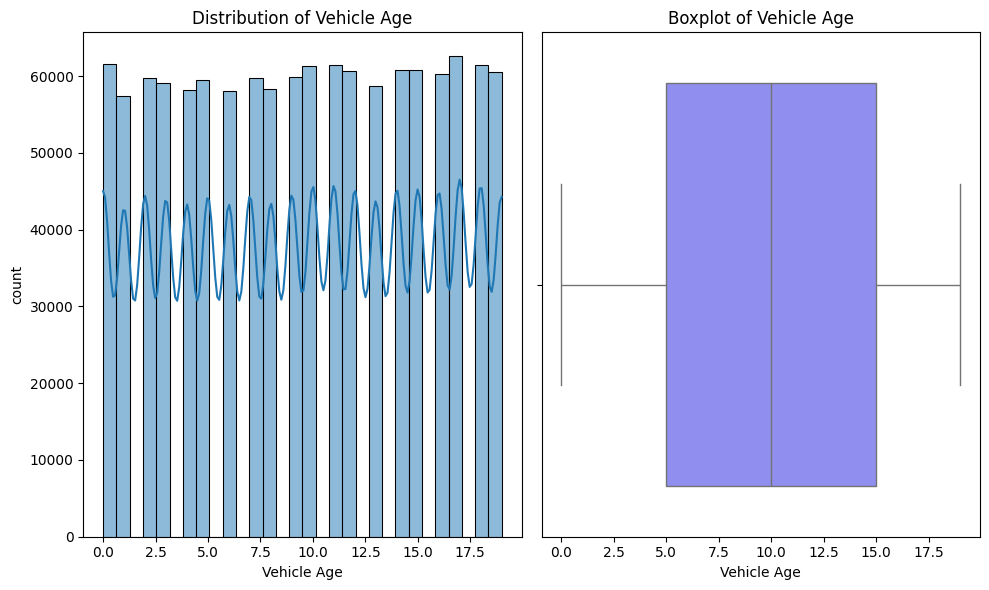

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


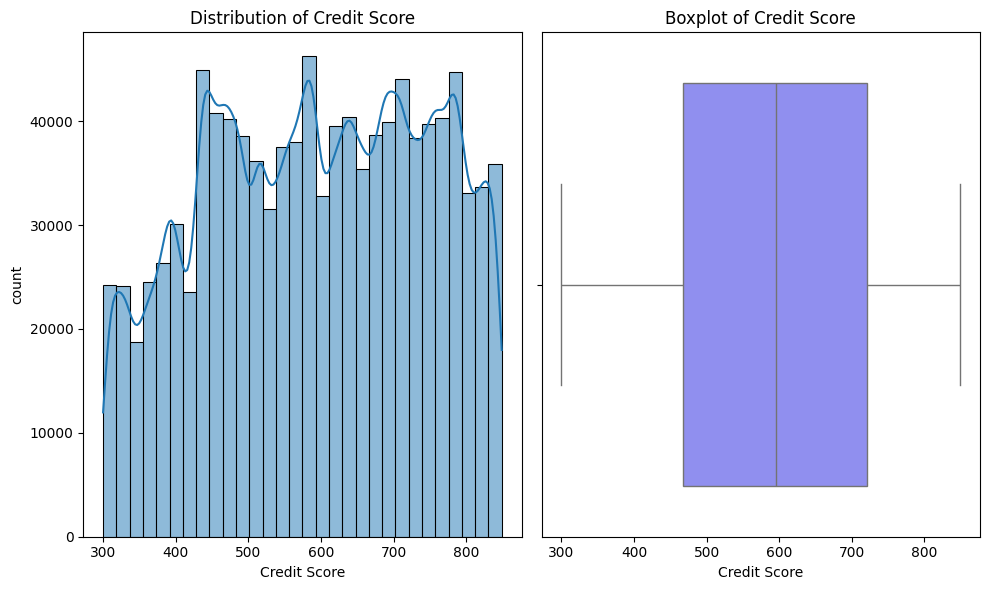

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


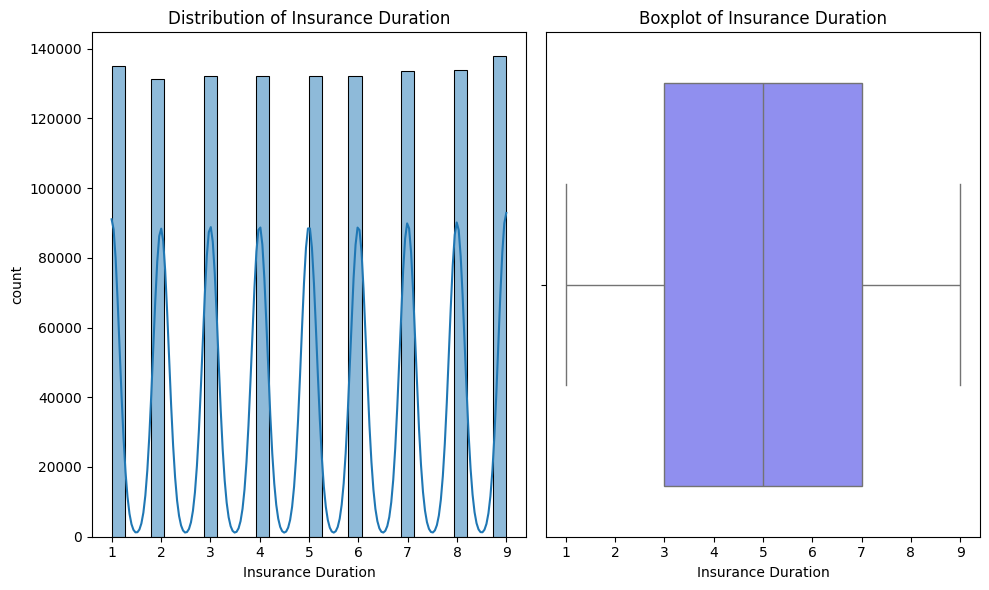

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


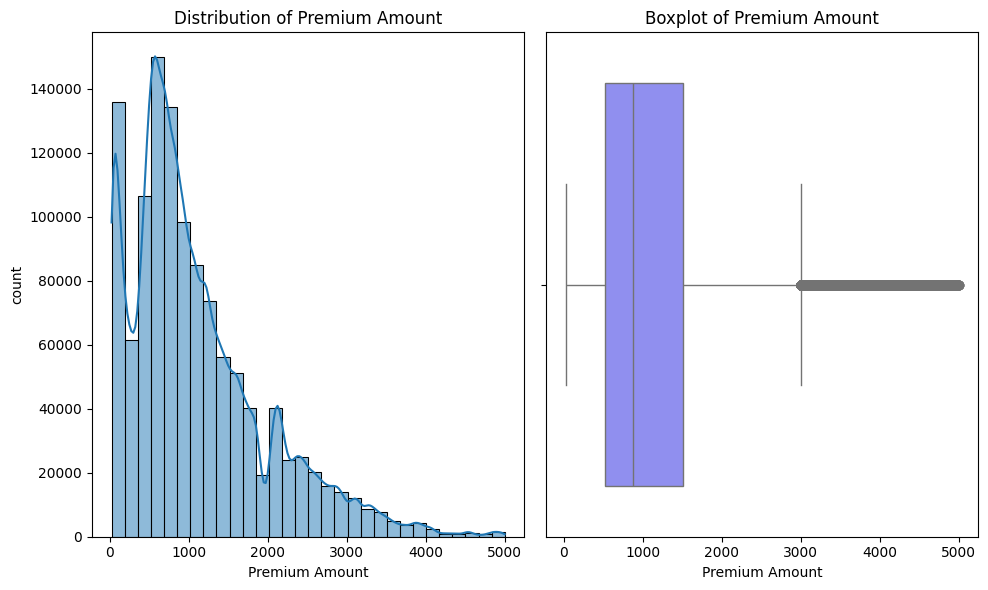

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


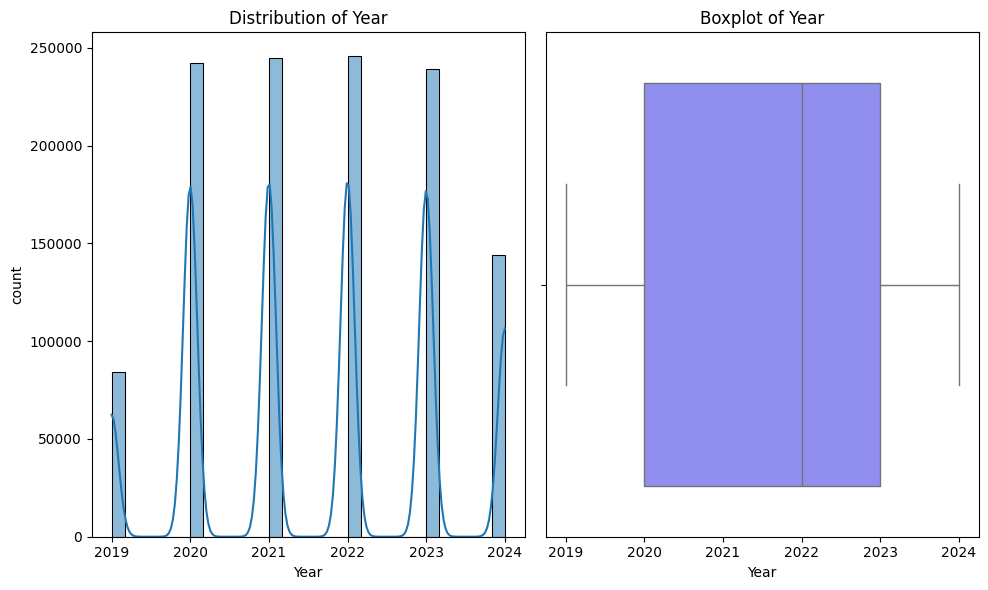

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


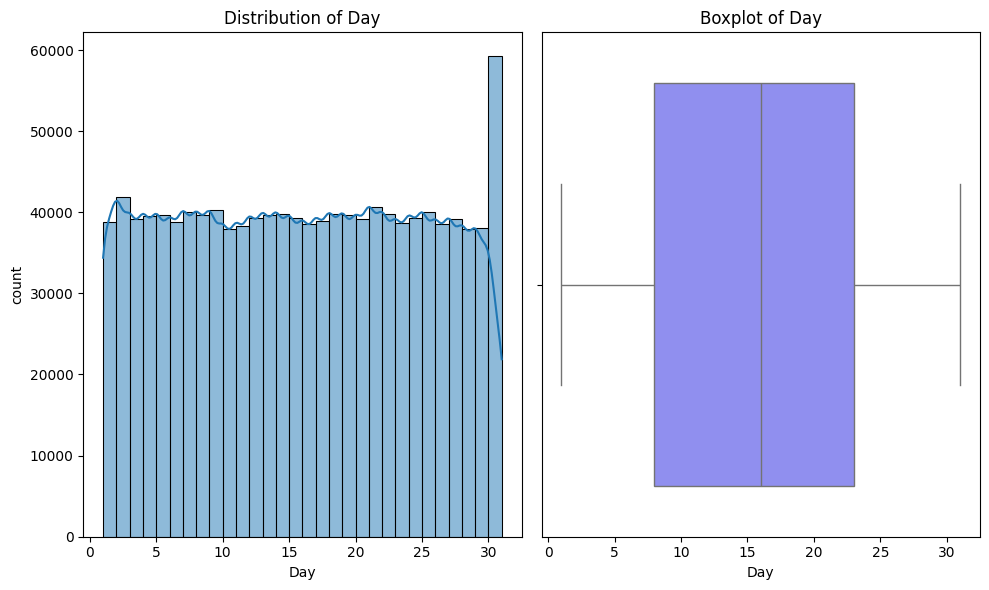

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


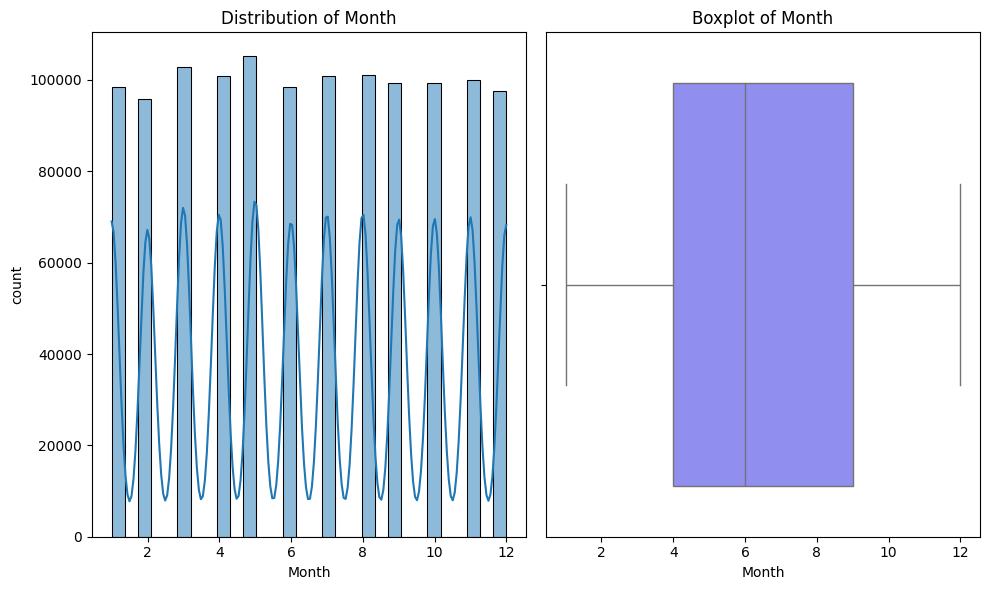

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


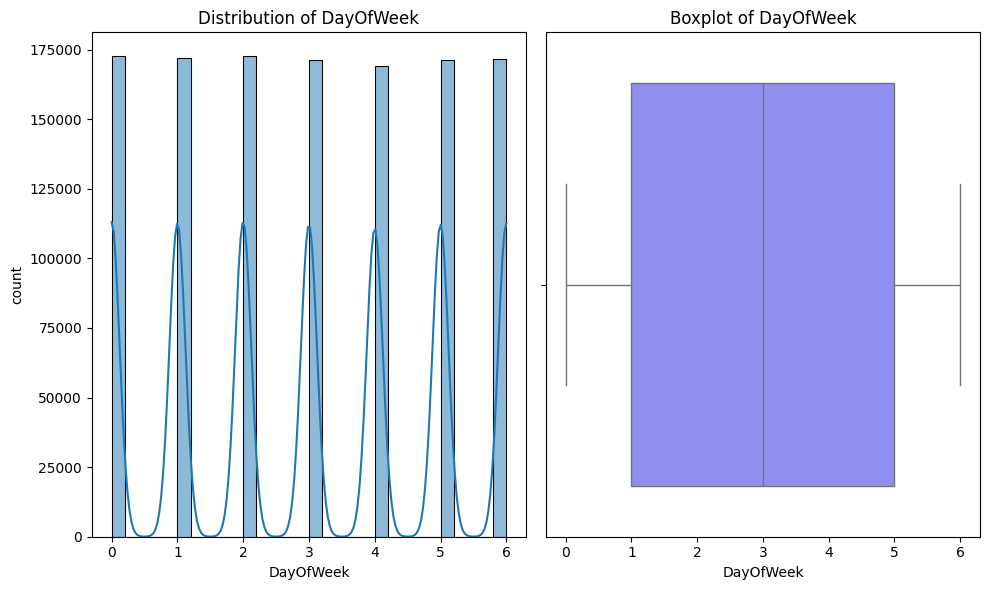

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


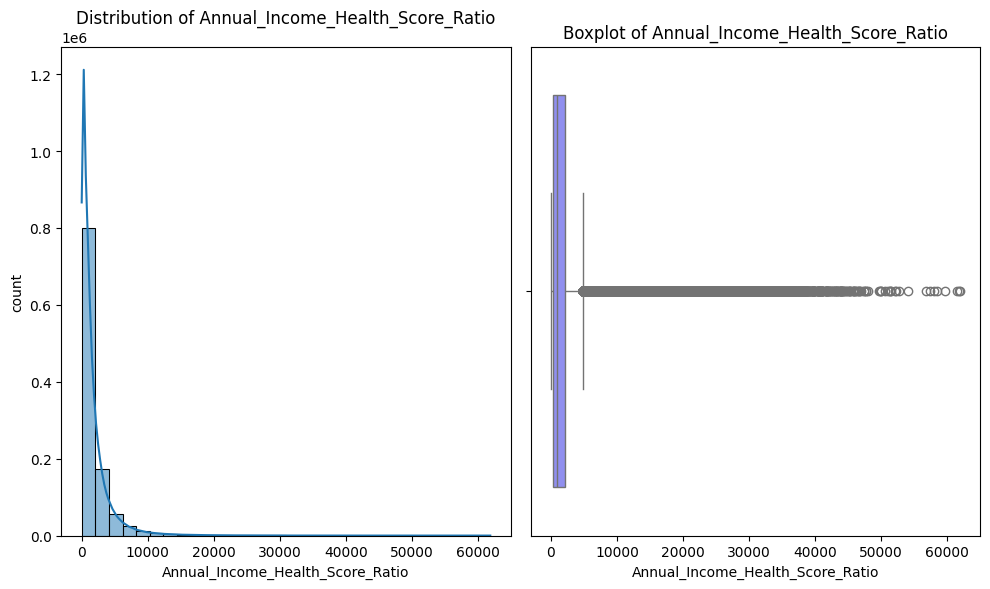

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


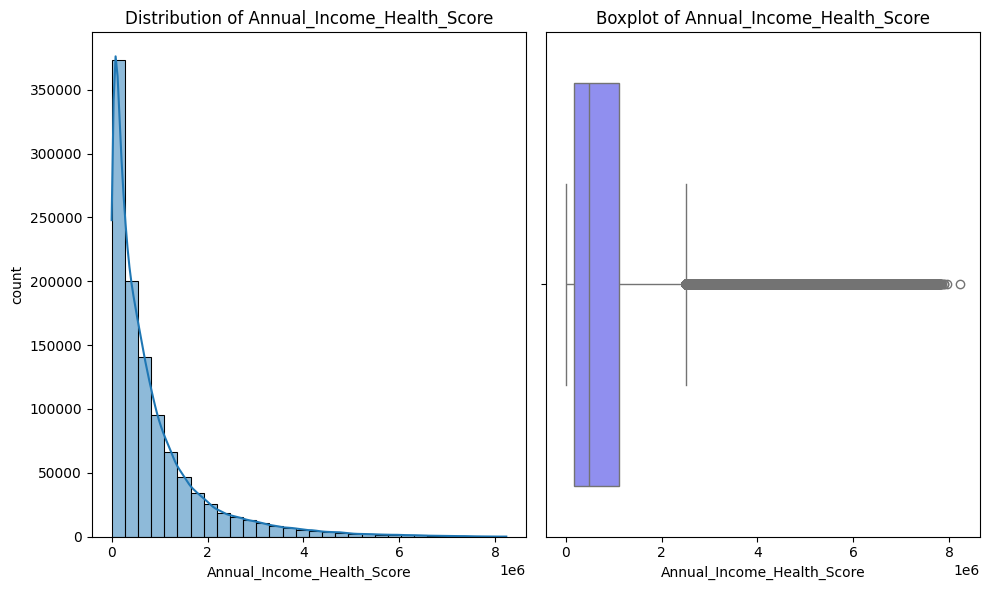

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


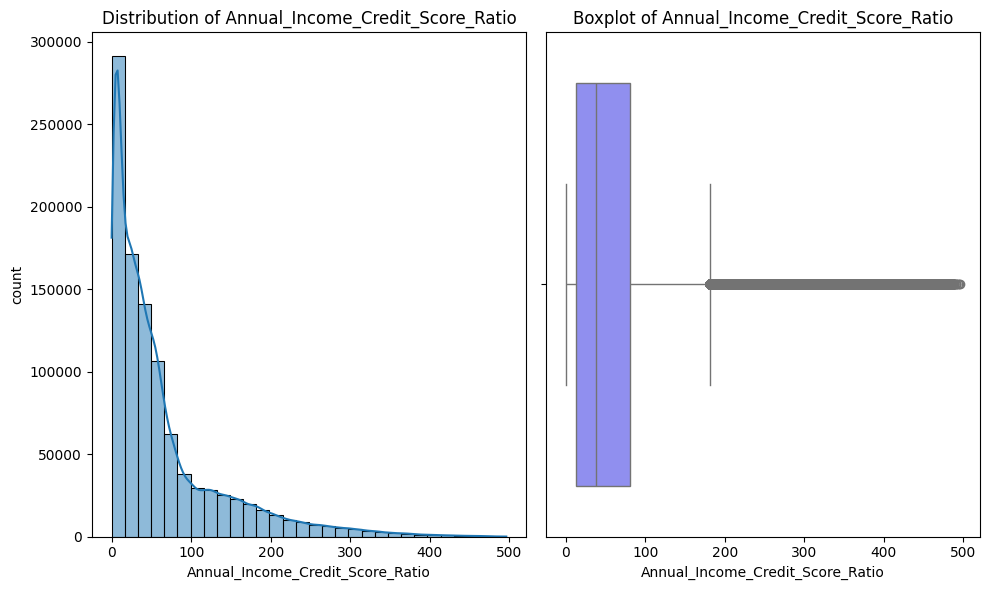

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


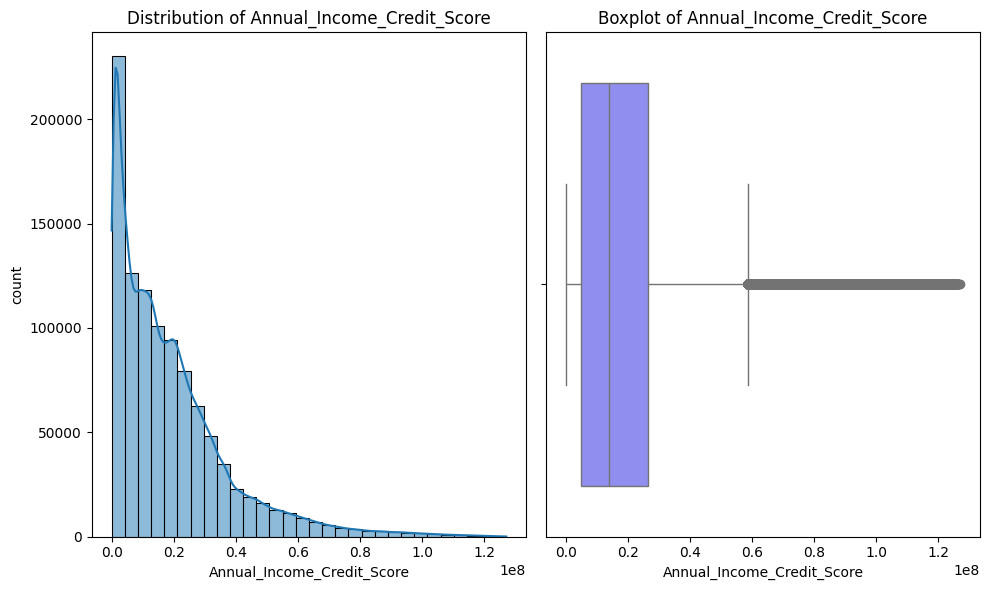

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


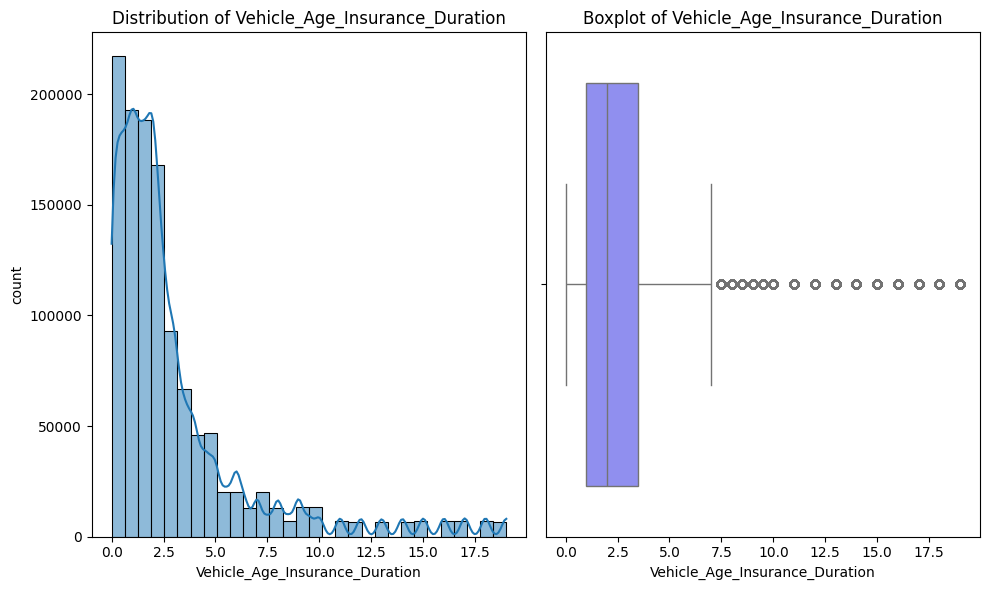

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


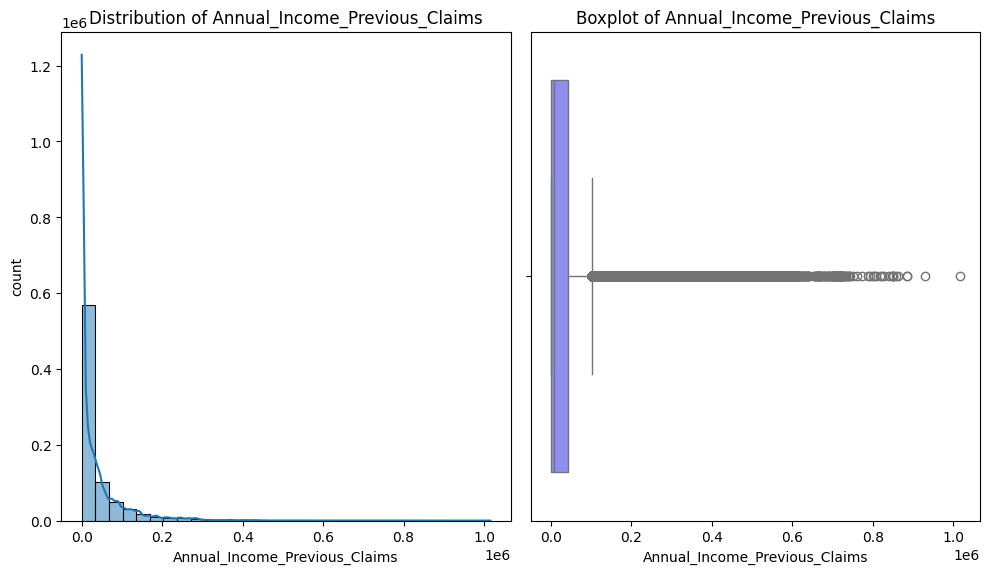

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


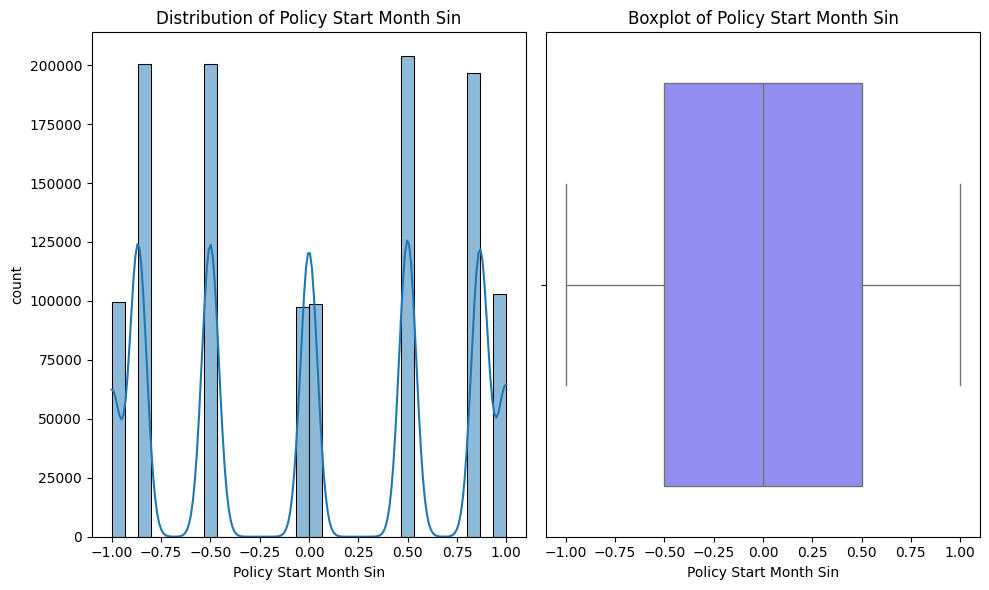

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


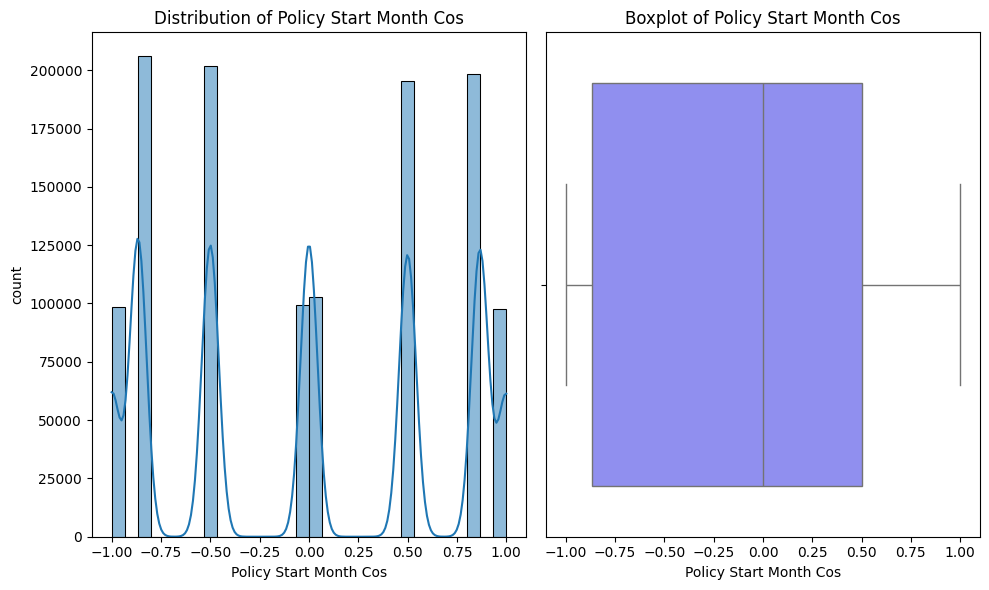

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


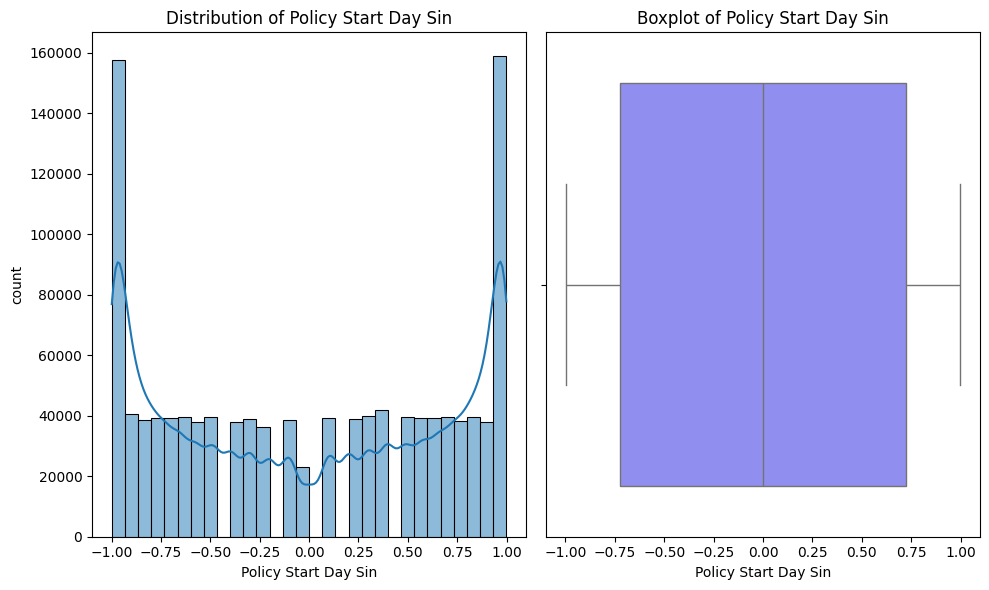

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


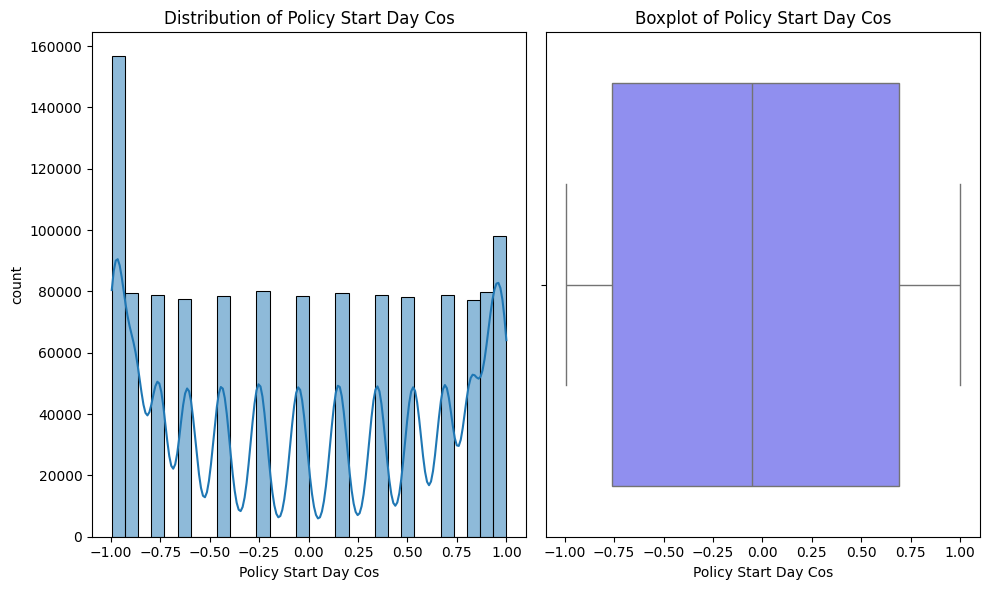

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


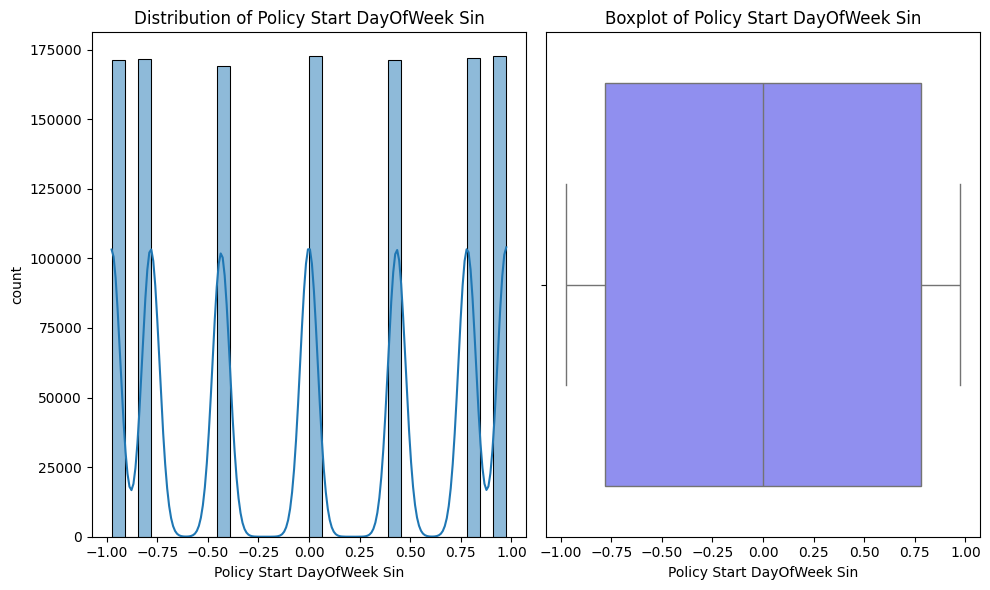

/tmp/ipykernel_879/34760624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])


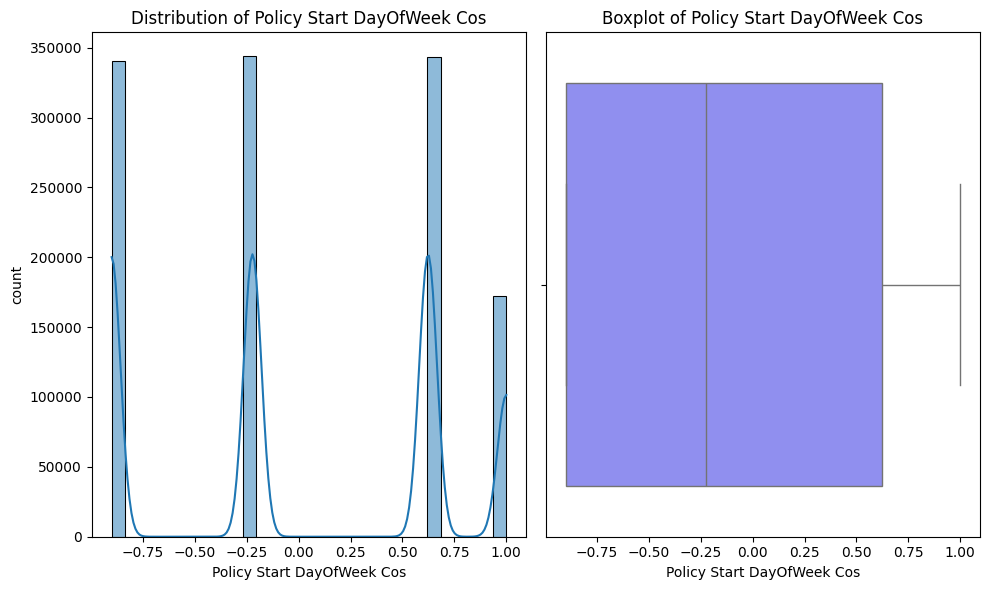

In [13]:
for i in num_cols:
    fig, axis = plt.subplots(1,2 , figsize=(10,6))
    sns.histplot(data = train_data, x = i, kde=True, bins=30, ax=axis[0])
    axis[0].set_title(f'Distribution of {i}')
    axis[0].set_xlabel(i)
    axis[0].set_ylabel('count')
    
    sns.boxplot(data = train_data, x=i, palette='cool', ax=axis[1])
    axis[1].set_title(f'Boxplot of {i}')
    axis[1].set_xlabel(i)
    plt.tight_layout()
    plt.show()

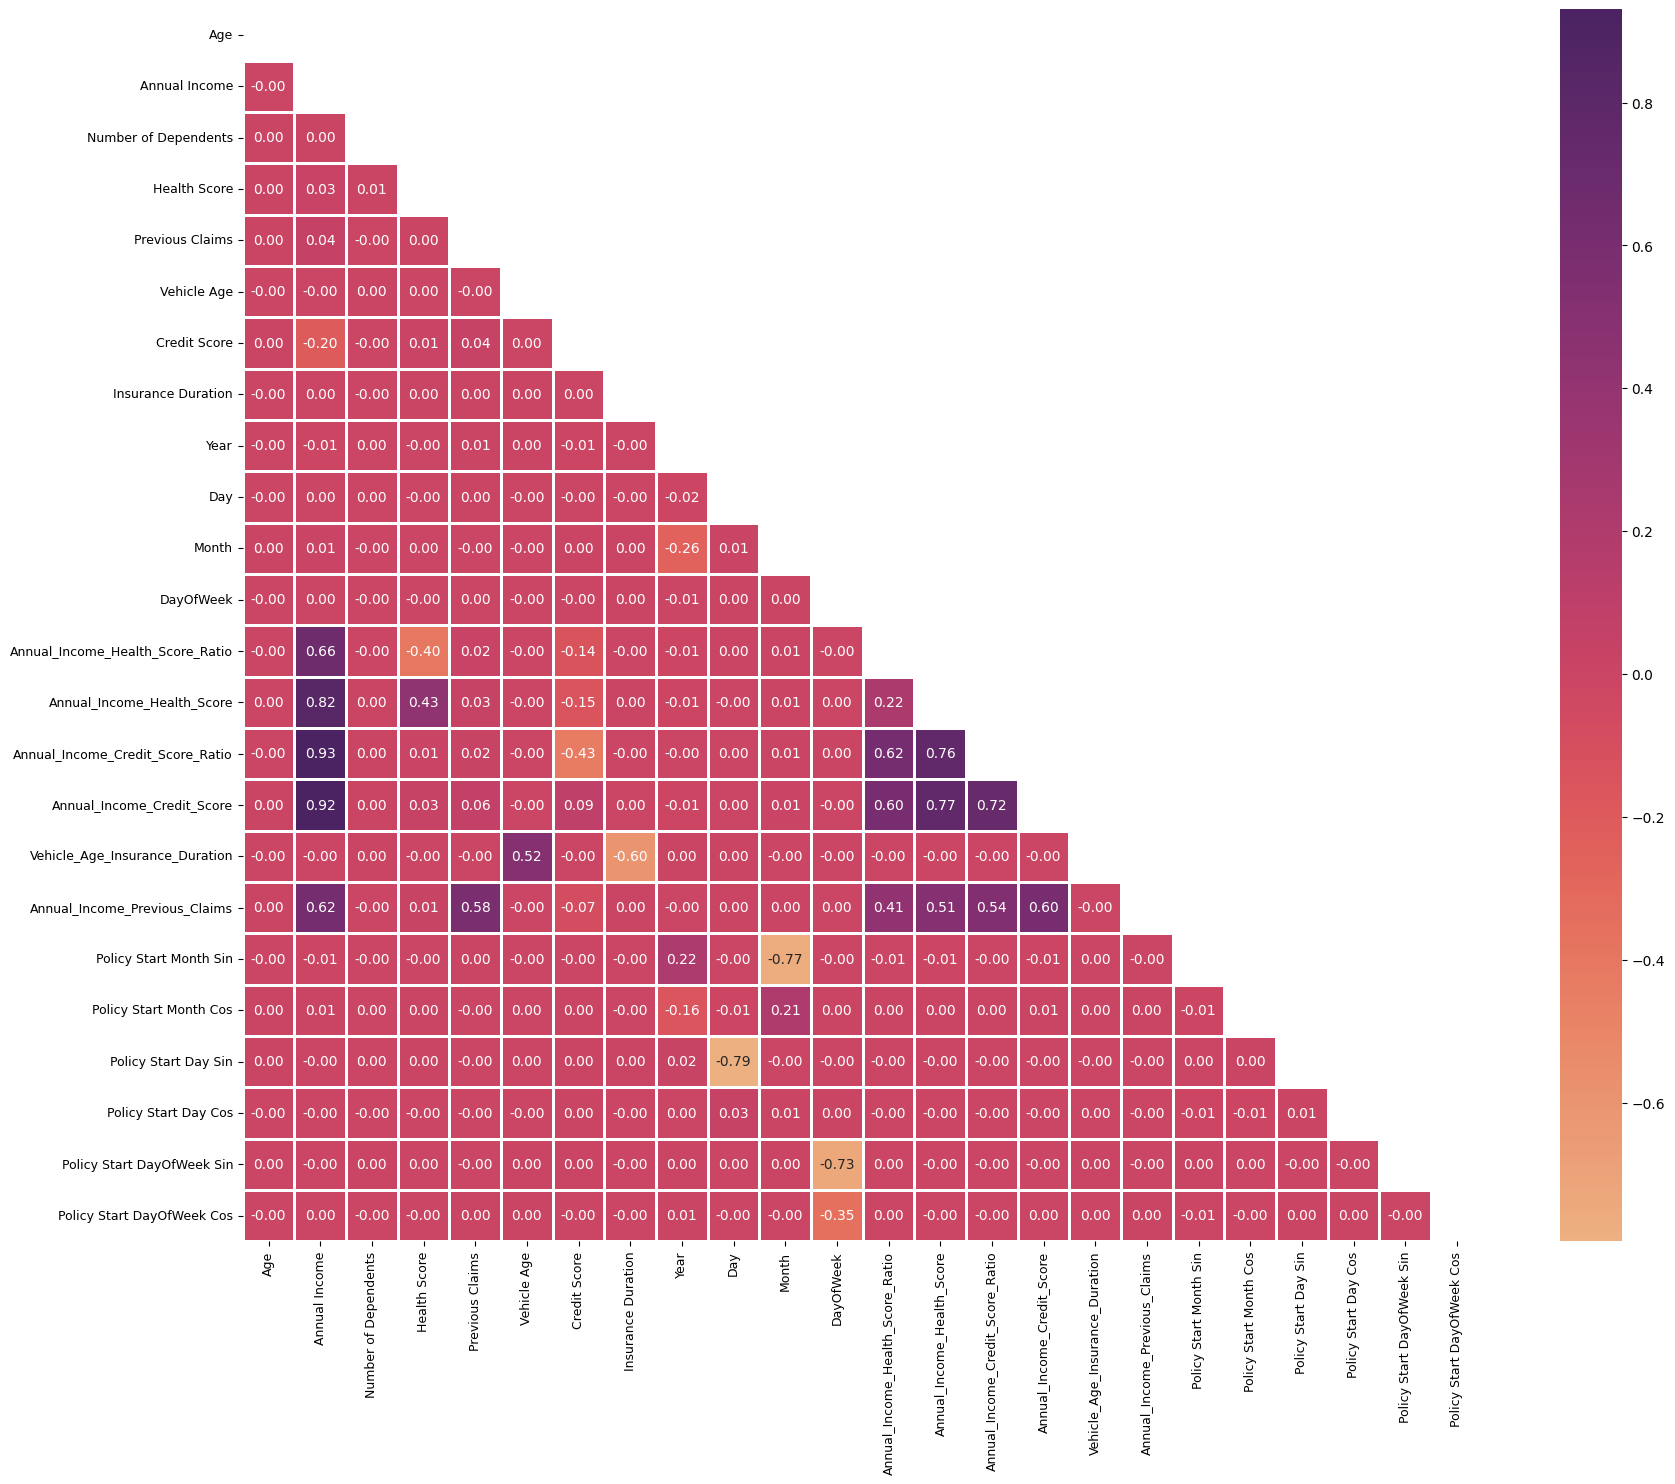

In [26]:
corr_mat = train_data[num_cols].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.figure(figsize = (20,16))
sns.heatmap(train_data[num_cols].corr(),
            mask=mask,
            annot = True ,   fmt ='.2f',
            linewidth=1    ,cmap = 'flare'
           )
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.show()

In [15]:
X = train_data.drop(columns=['id', 'Premium Amount'], axis=1)
y = train_data['Premium Amount']

In [16]:
num_cols.remove('id')
num_cols.remove('Premium Amount')

In [17]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

X = preprocessor.fit_transform(X)

In [18]:
x_test = preprocessor.transform(test_data)

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error

model = xgb.XGBRegressor(eval_metric = 'rmsle', tree_method='hist')

In [21]:
best_parameter =  {'random_state': 42,
                   'grow_policy': 'lossguide',
                   'n_jobs': -1,
                   'objective': 'reg:squaredlogerror',
                   'eval_metric': 'rmsle'}

xgb_mb= XGBRegressor(**best_parameter) 
xgb_mb.fit(X_train ,y_train)

y_pred = xgb_mb.predict(X_test)
rmsle= np.sqrt(mean_squared_log_error(y_test,y_pred))
print(f"RMSLE : {rmsle} " )

RMSLE : 1.0856378326754432 


In [22]:
xgb_output = xgb_mb.predict(x_test)

In [24]:
output = pd.DataFrame(test_data['id'])
output['Premium Amount'] = xgb_output
output[['id','Premium Amount']].to_csv('submission.csv', index=None)